**Сборный проект**

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. 

Цель проекта: выявить определяющие успешность игры закономерности, что в дальнейшем позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Имеющиеся данные: данные до 2016 года. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xboxили PlayStation). 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

##  Общая информация о данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
games = pd.read_csv('games.csv')

In [3]:
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

В нашем распоряжении имеется датасет, состоящий из 16715 строк и 10 столбцов. 

Необходимые преобразования:

1. Привести названия столбцов к нижнему регистру

2. Преобразовать данные в нужные типы:

* Столбец Year_of_Release в тип int
* Столбец User_Score в тип float

3. Обработать пропуски:

* Столбец Name, Genre: всего 2 пропуска, поэтому можно удалить, возникновение пропусков случайное.
* Столбец Year_of_Release: вероятно, инфомация о годе релиза игры не была собрана агрегатором. Теоретически, эту информацию можно восстановить из открытых источников, но так как таких пропусков всего 1.6%, мы удалим эти строки, на задачах нашего исследования это не должно сказаться.
* Столбец Critic_Score, User_Score, Rating: пропусков много, но их происхождение не случайно. Вероятно, не всем играм критики и пользователи ставят оценки и не всем играм присуждается рейтинг. Оставим пропуски без изменений, их заполнение может исказить общую картину. В столбце User_Score имеется аббервиатура 'tbd', т.е. 'to be determined', что означает, что в данный момент происходит оценка: в нашем случае это означает то же самое, что 'NaN'.

4. Проверить наличие дубликатов.


5. Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец

## Предобработка данных

1. Приведем названия столбцов к нижнему регистру

In [7]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

2. Преобразуем данные в нужные типы

In [8]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

3. Обработаем пропуски:

In [9]:
games = games.dropna(subset=['name', 'year_of_release','genre'])

In [10]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN) 

In [11]:
games['user_score'] = games['user_score'].astype('float')

In [12]:
games.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

В столбце с рейтингом игры заменим пропущенные значения значением-флагом ('norating').

In [13]:
games['rating'] = games['rating'].fillna('norating')

4. Проверим наличие дубликатов

In [14]:
games.duplicated().sum()

0

Дубликатов нет

5. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [15]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [16]:
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,norating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,norating,31.38


## Исследовательский анализ данных

**Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?**

<AxesSubplot:xlabel='year_of_release'>

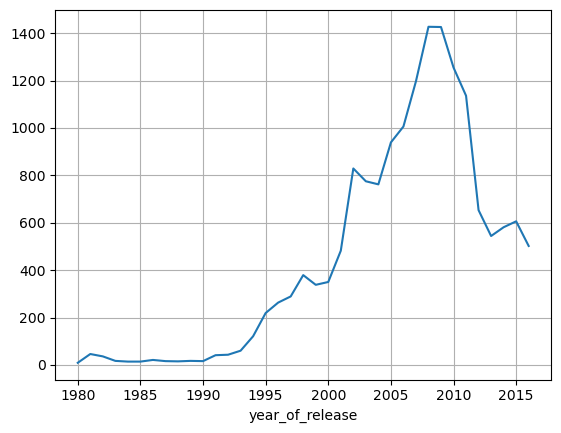

In [17]:
games.groupby('year_of_release')['name'].agg('count').plot(grid=True)

График показывает, какое количество игр выпускалось в разные годы. Мы видим, что период до 1993 года характеризуется практически нулевой активностью, в эти годы эра индустрии компьютерных игр еще не наступила, поэтому эти данные не представляют интерес для нашего анализа. В 1994 году начинается новая эпоха - компьютерные игры начинают входить в жизнь людей, и этот подъем продолжается до 2008 года. С 2008 года мы видим угасание интереса к компьютерным играм.

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [18]:
top10_platforms = games.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).head(10)

In [19]:
top10_platforms

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

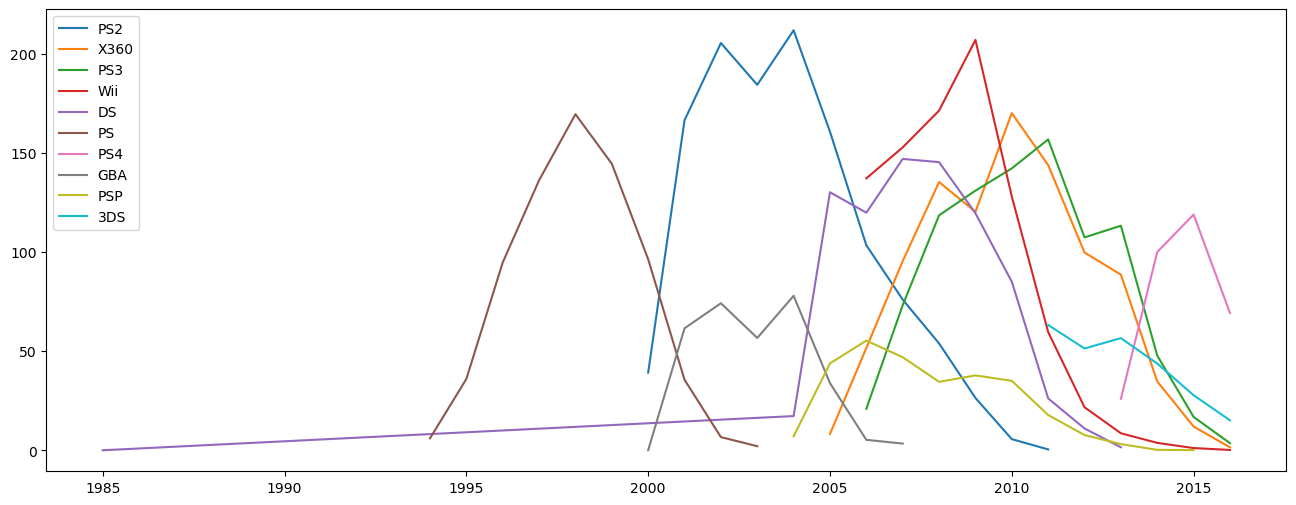

In [20]:
plt.figure(figsize=(16, 6))
for platform in top10_platforms.index:
    plt.plot(games[games['platform']==platform].groupby('year_of_release')['total_sales'].agg('sum'), label=platform)
    plt.legend()

Топ платформ с наибольшими суммарными продажами - это PS2, X360, PS3. 
Из графика видно, что "срок жизни" платформ составляет около 10 лет, пик наступает через 5 лет, после чего интерес пользователей начинает стремительно угасать.

**Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.**

Так как срок существования платформ составляет около 10 лет, то в качестве актуального периода будем считать последние 10 лет, т.е. с 2007 по 2016. 

В качестве актуального периода будем считать последние 3 года. Сфера компьютерных игр изменяется чрезвыйчайно быстро, поэтому не имеет смысл рассматривать уже отжившие тренды.

In [21]:
games_actual_period = games[games['year_of_release']>2013]
games_actual_period.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,norating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,norating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,norating,7.98


**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

In [22]:
top10_platforms_actual_period = games_actual_period.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).head(10)
top10_platforms_actual_period

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

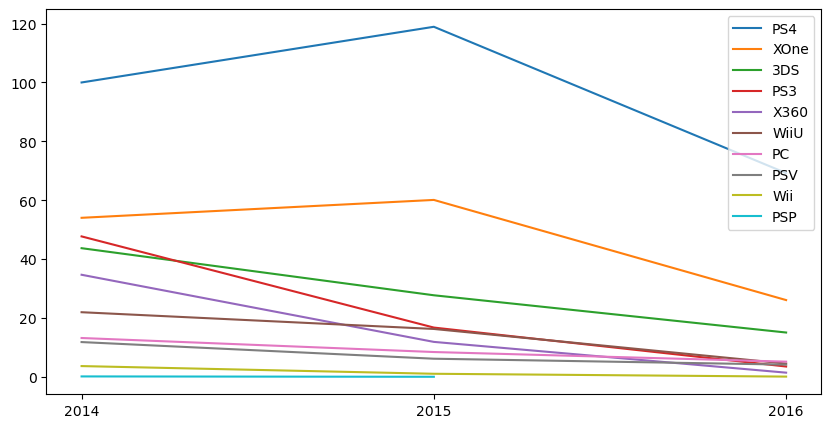

In [23]:
plt.figure(figsize=(10, 5))
for platform in top10_platforms_actual_period.index:
    plt.plot(games_actual_period[games_actual_period['platform']==platform].groupby('year_of_release')['total_sales'].agg('sum'), label=platform)
    plt.legend()
    plt.xticks(np.arange(2014, 2017, 1))  

Из графика видно, что на 2016 год практически все платформы находятся в стадии снижения показателя по продажам.

Всем известные популярные платформы, такие как PS2, X360, PS3, Wii, DS уже прошли свой цикл жизни и их развитие практически закончилось. 

Однако, можно выделить платформы PS4 и XOne, суммарные продажи которых по-прежнему высоки. Эти две платформы являются на данный момент самыми перспективными. 

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

Посмотрим на платформы, лидирующие по продажам

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

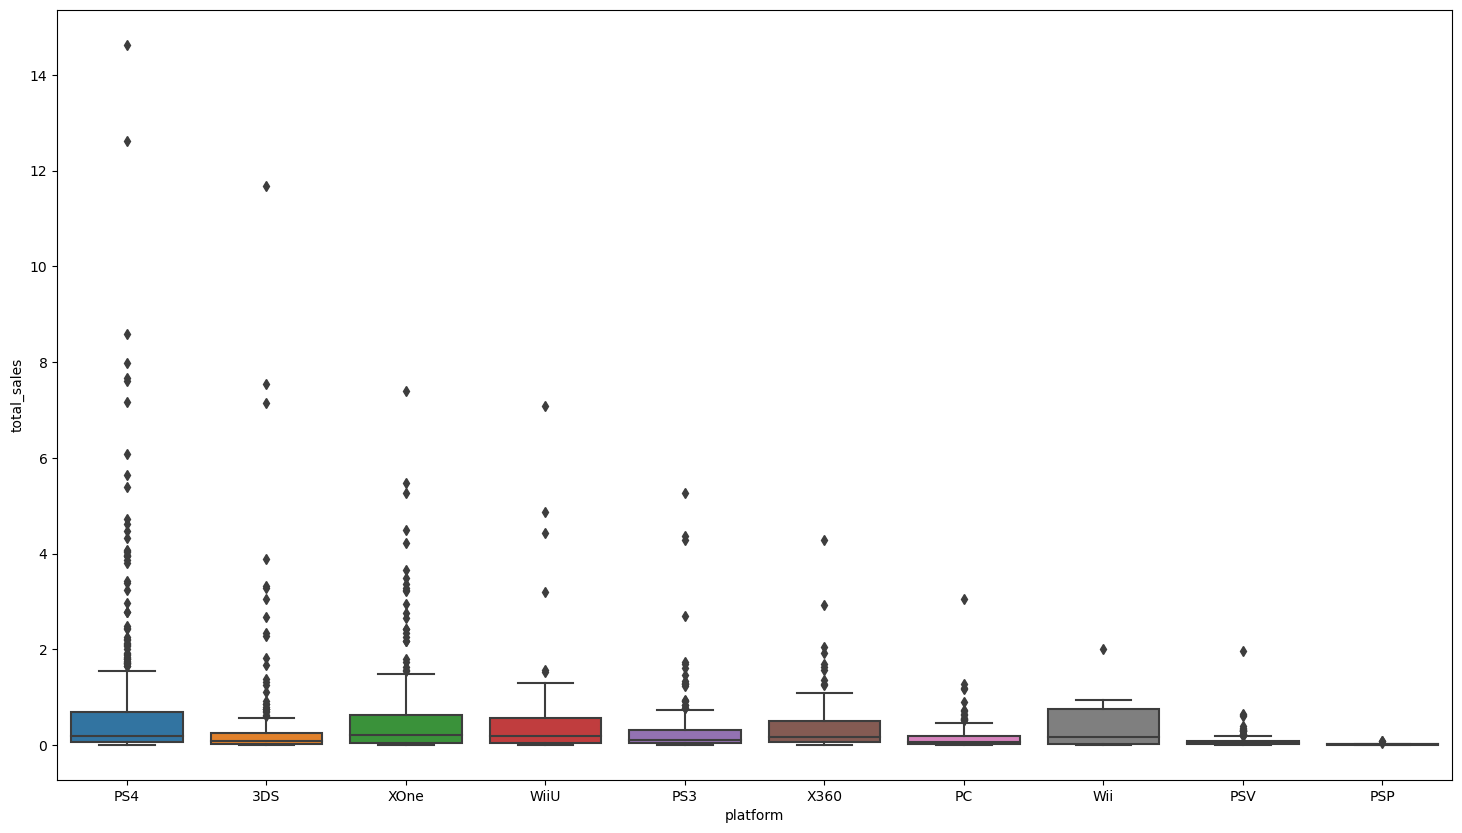

In [24]:
plt.figure(figsize=(18,10)) 
sns.boxplot(data=games_actual_period.query('platform == ["PS4", "XOne", "3DS", "PS3", "X360", "WiiU", "PC", "PSV", "Wii", "PSP"]' ), x='platform', y='total_sales')

Избавимся от выбросов

(0.0, 2.0)

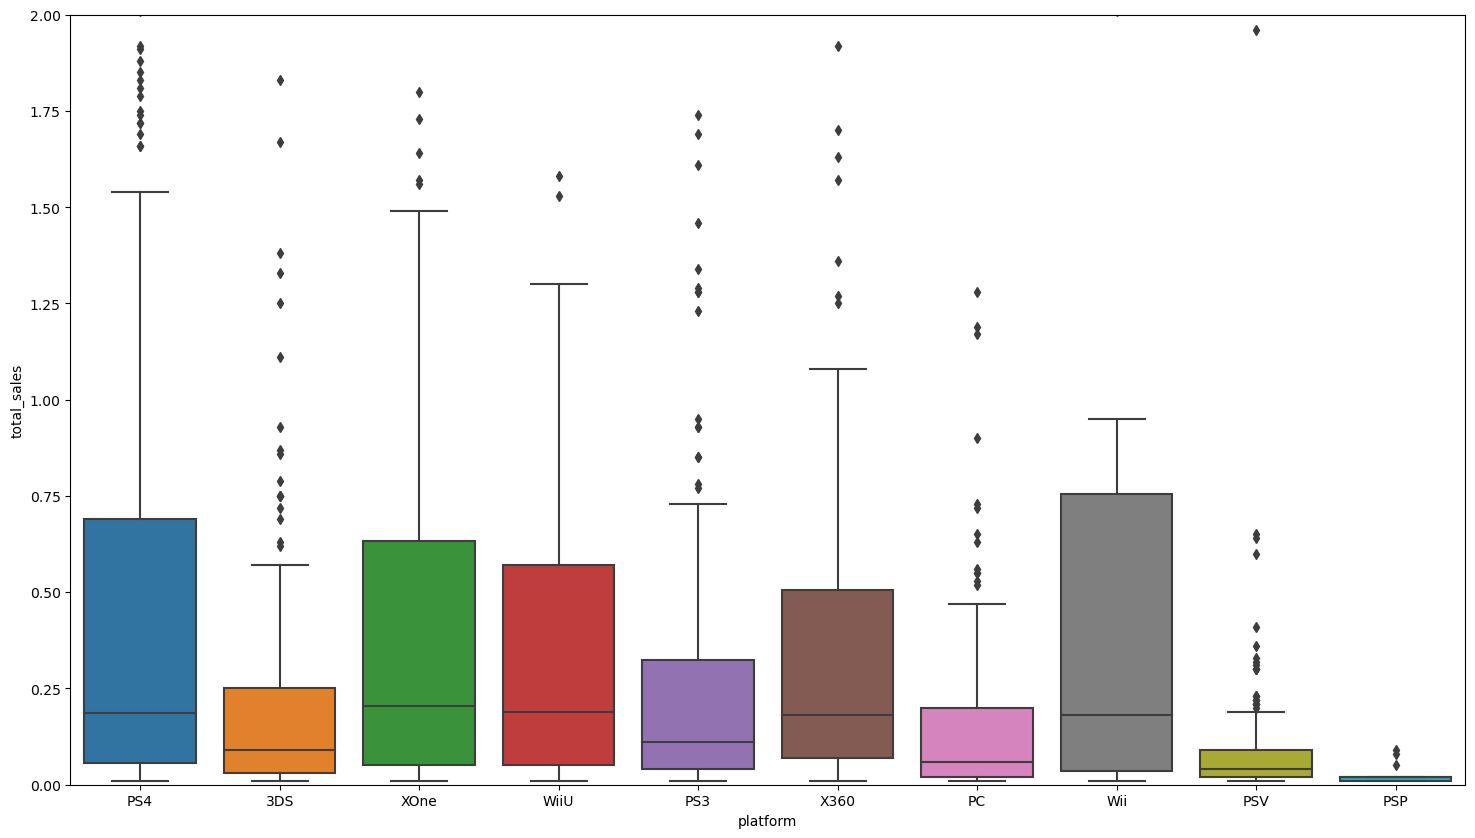

In [25]:
plt.figure(figsize=(18,10)) 
sns.boxplot(data=games_actual_period.query('platform == ["PS4", "XOne", "3DS", "PS3", "X360", "WiiU", "PC", "PSV", "Wii", "PSP"]' ), x='platform', y='total_sales')
plt.ylim(top=2)
plt.ylim(bottom=0) 

Исходя из графиков видно, что больше всего продаж у WiiU, затем PS4, XOne, WiiU и X360.
Медиана по топовым платформам варьируется примерно от 0,1 до 0,25 млн долларов прибыли за игру.

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

In [26]:
ps4 = games_actual_period[games_actual_period['platform']=='PS4']
ps4 = ps4[['total_sales', 'critic_score', 'user_score']]
ps4.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


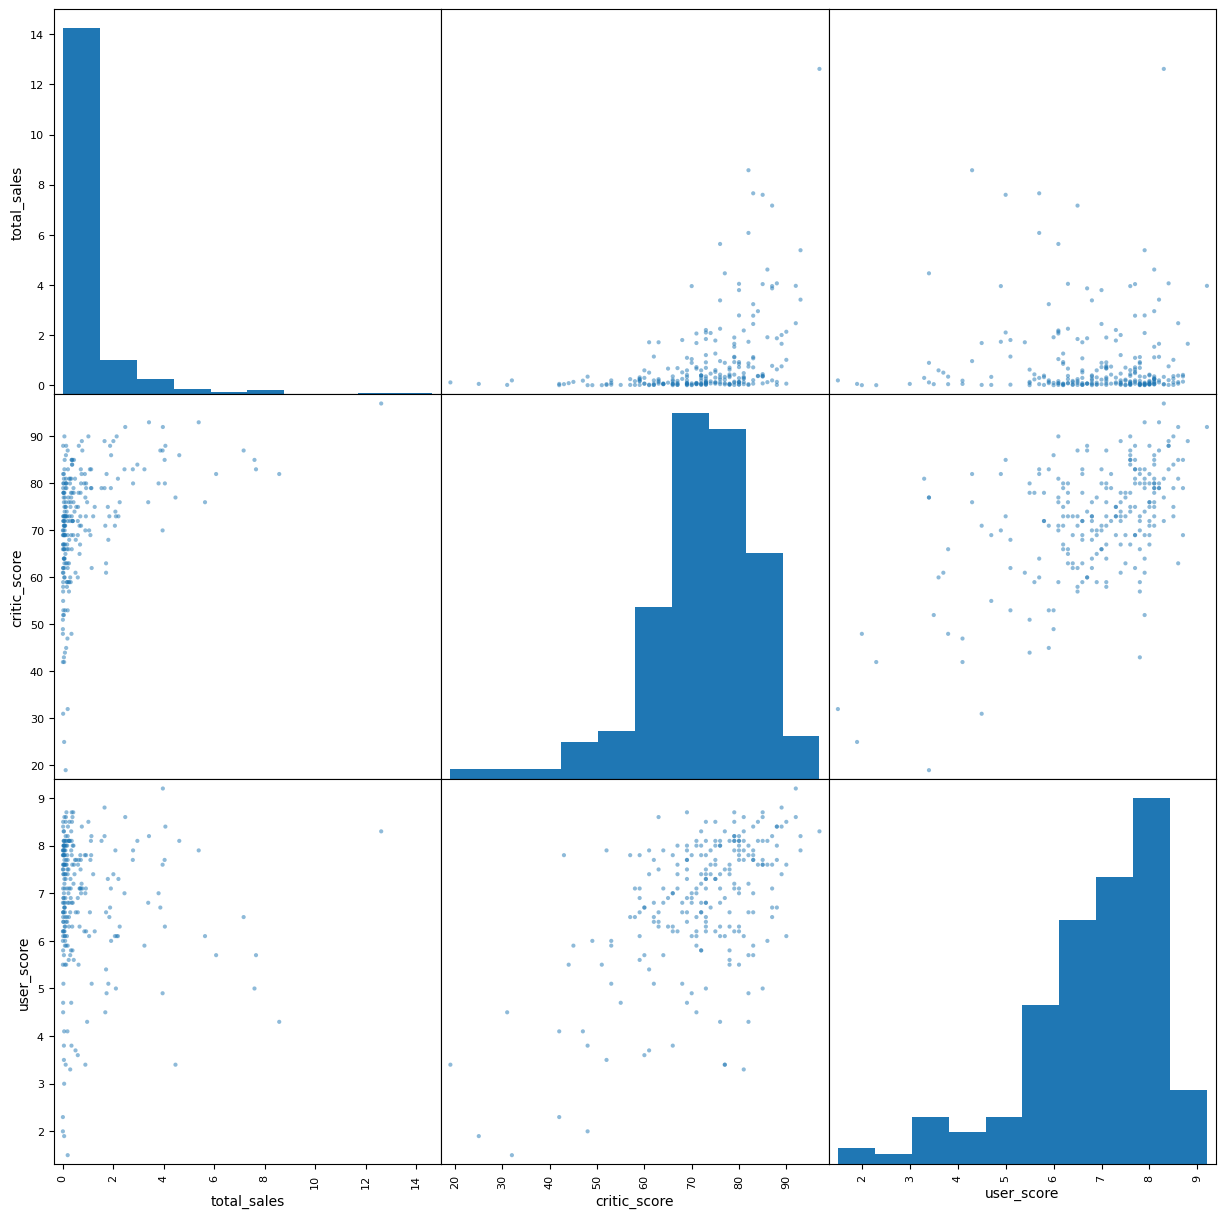

In [27]:
pd.plotting.scatter_matrix(ps4, figsize=(15,15));

Между продажами PS4 и отзывами критиков можно заметить умеренную корреляцию (0.4), зависимость прямая, т.е. чем выше оценка, тем больше продаж. Что касается отзывов покупателей, то здесь зависимость не прослеживается, коэффициент корреляции стремится к нулю. 
Это говорит о том, что покупатели прислушиваются больше к критикам, а не к оценкам других пользователей. 

**Соотнесите выводы с продажами игр на других платформах.**

Посмотрим, как влияют отзывы критиков и пользователей на продажи других платформ. 
Рассмотрим XOne, X360, PS3, Wii

In [28]:
XOne = games_actual_period[games_actual_period['platform']=='XOne'][['total_sales', 'critic_score', 'user_score']]
X360 = games_actual_period[games_actual_period['platform']=='X360'][['total_sales', 'critic_score', 'user_score']]
PS3 = games_actual_period[games_actual_period['platform']=='PS3'][['total_sales', 'critic_score', 'user_score']]
Wii = games_actual_period[games_actual_period['platform']=='Wii'][['total_sales', 'critic_score', 'user_score']]

In [29]:
XOne.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


In [30]:
X360.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.525723,-0.138445
critic_score,0.525723,1.000000,0.625309
user_score,-0.138445,0.625309,1.000000


In [31]:
PS3.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.446575,-0.166761
critic_score,0.446575,1.000000,0.693445
user_score,-0.166761,0.693445,1.000000


In [32]:
Wii.corr()

,total_sales,critic_score,user_score
total_sales,1.0,NaN,1.0
critic_score,NaN,NaN,NaN
user_score,1.0,NaN,1.0


Мы видим умеренный уровень корреляции между продажами и отзывами критиков платформ XOne, X360, PS3 (около 0.4), эта зависимость аналогична платформе PS4. Неожиданным образом выделяется Wii, где коэффициент корреляции несколько ниже (0.2), что свидетельствует о том, что пользователи Wii меньше прислушиваются к мнению критиков.
Если говорить про отзывы покупателей, то корреляция между продажами и мнением покупателей абсолютно не прослеживается у платформы XOne; у других трех платформ коэффициент несколько выше (около, 0.12), но это значение все равно очень маленькое для того, чтобы говорить о наличии линейной связи.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

<AxesSubplot:xlabel='genre'>

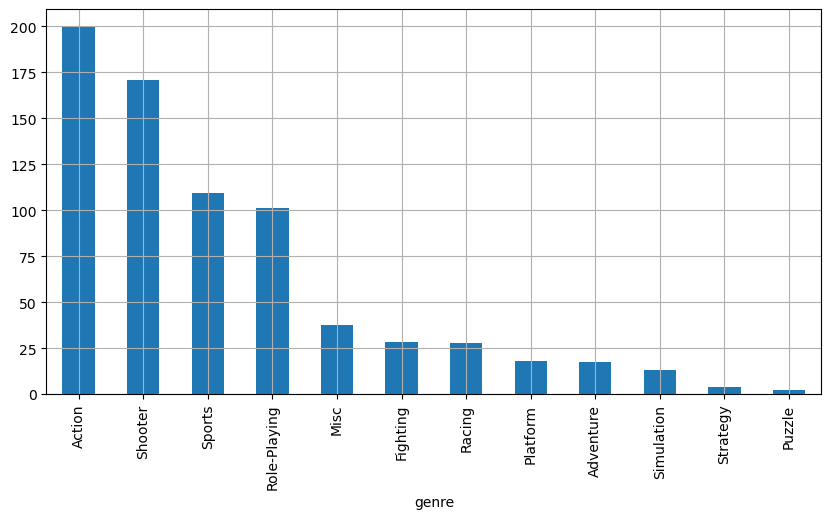

In [33]:
genres2 = games_actual_period.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genres2.plot(kind='bar', figsize=(10,5), grid=True)

Самыми прибыльными жанрами можно считать Action, Shooter и Sports. Наименее прибыльные жанры - это Puzzle и Strategy.

<AxesSubplot:xlabel='genre', ylabel='total_sales'>

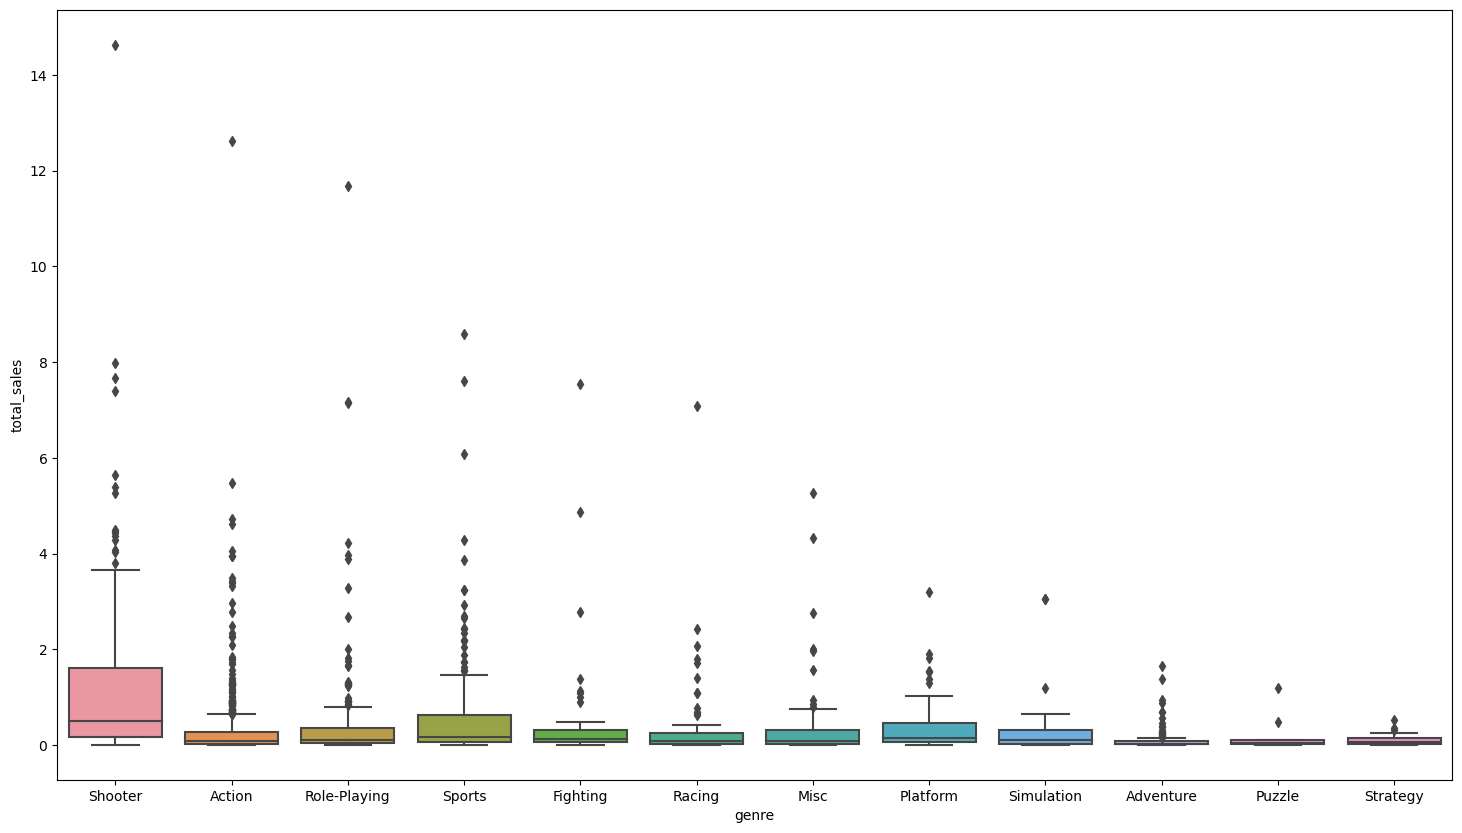

In [34]:
plt.figure(figsize=(18,10)) 
sns.boxplot(data=games_actual_period, x='genre', y='total_sales')

Избавимся от выбросов

(0.0, 4.0)

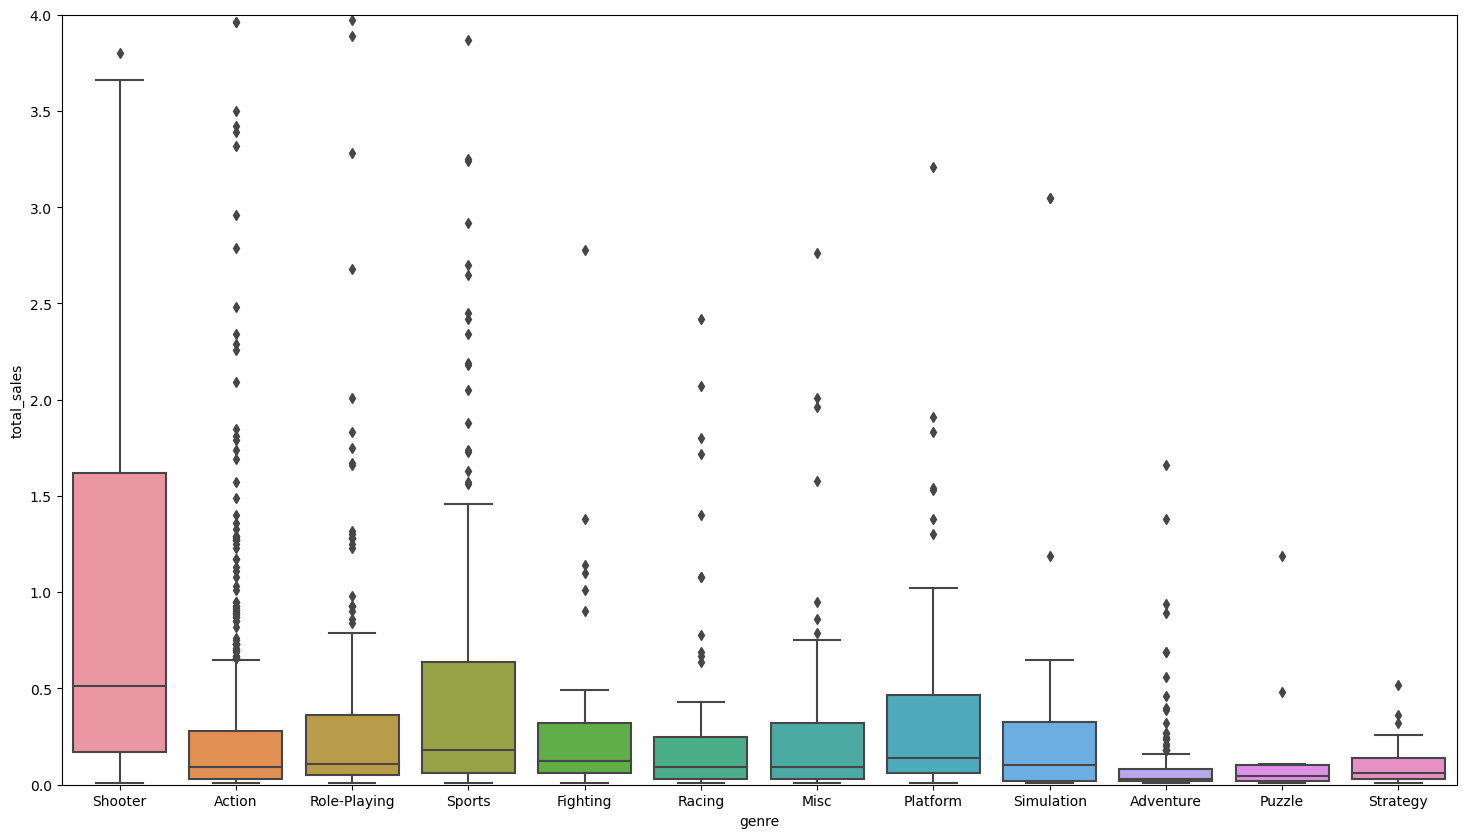

In [35]:
plt.figure(figsize=(18,10)) 
sns.boxplot(data=games_actual_period, x='genre', y='total_sales')
plt.ylim(top=4)
plt.ylim(bottom=0) 

Однозначно, самым популярным жанром видеогр является Shooter. Это стабильно самый популярный жанр.

## Составление портрета пользователя каждого региона

**Топ-5 популярных платформ для пользователей Северной Америки, Европы и Японии**

In [36]:
na_top5_pl = games_actual_period.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_top5_pl = games_actual_period.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_top5_pl = games_actual_period.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

<AxesSubplot:xlabel='platform'>

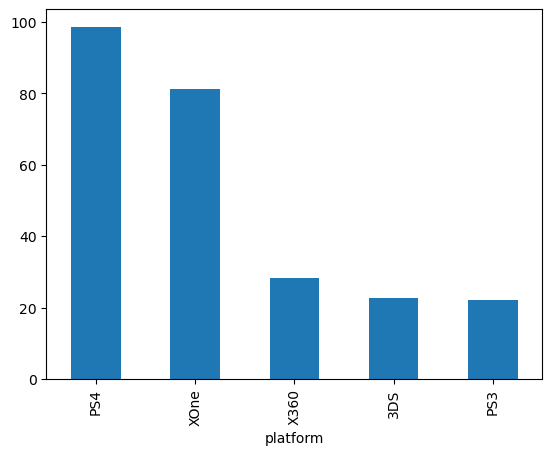

In [37]:
na_top5_pl.plot(kind='bar')

<AxesSubplot:xlabel='platform'>

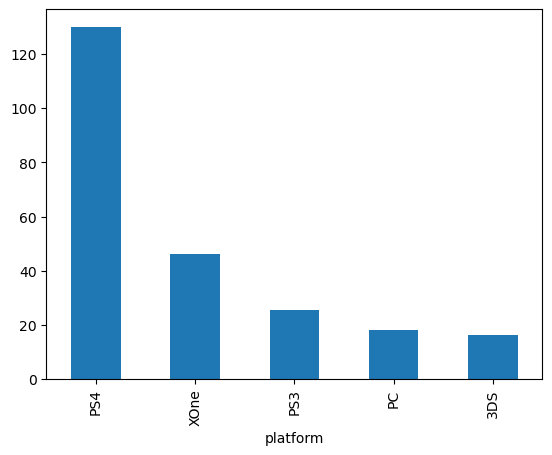

In [38]:
eu_top5_pl.plot(kind='bar')

<AxesSubplot:xlabel='platform'>

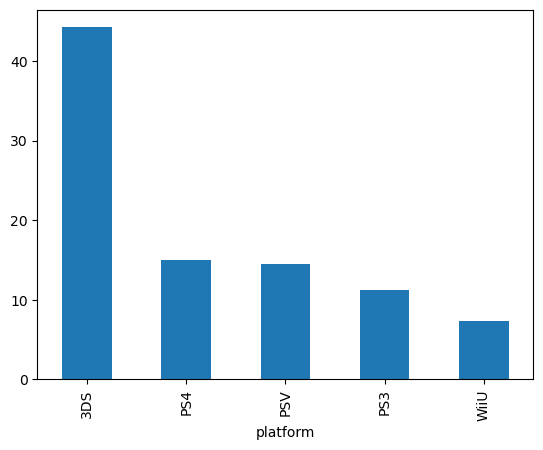

In [39]:
jp_top5_pl.plot(kind='bar')

Лидеры продаж во всех регионах разные: Америка - X360, Европа - PS3 и Япония - DS. 

Итоговый Топ-5 рейтинг платформ за последние 10 лет:

* Северная Америка: X360, Wii, PS3, DS, PS4
* Европа: PS3, X360, Wii, PS4, DS
* Япония: DS, 3DS, PS3, PSP, Wii


**Топ-5 популярных жанров для пользователей Северной Америки, Европы и Японии**


In [40]:
na_top5_genres = games_actual_period.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_top5_genres = games_actual_period.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_top5_genres = games_actual_period.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

<AxesSubplot:xlabel='genre'>

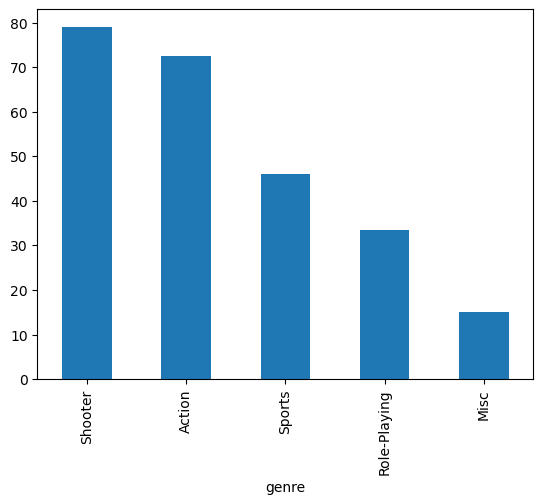

In [41]:
na_top5_genres.plot(kind='bar')

<AxesSubplot:xlabel='genre'>

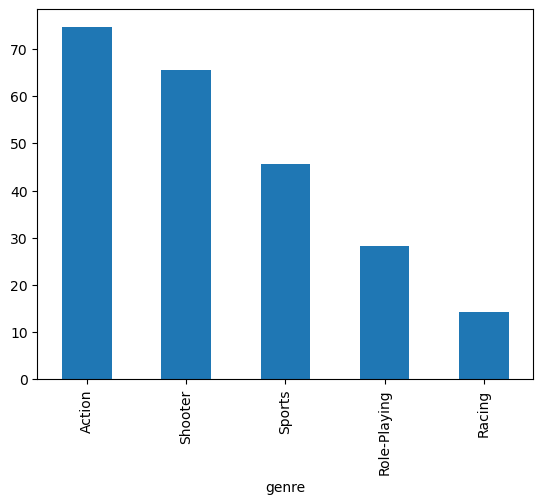

In [42]:
eu_top5_genres.plot(kind='bar')

<AxesSubplot:xlabel='genre'>

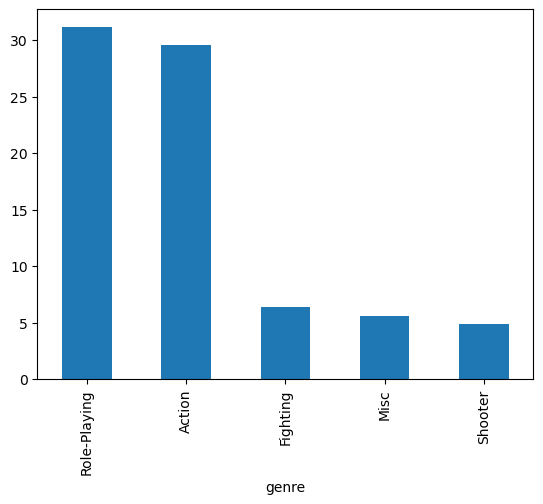

In [43]:
jp_top5_genres.plot(kind='bar')

В Америке и в Европе топ-5 популярных жанров практически полностью совпадают: на первом месте Action, затем идут Shooter, Sports, Misc. Лишь пятое место различается: в Америке это Role-playing, а в Европе - Racing. Несколько другая картина наблюдается в Японии: лидером являются ролевые игры, лишь затем Action, Misc, Sports. В японскую подборку не попал жанр Shooter, но зато появился жанр Adventure.

**Влияние рейтинга ESRB на продажи в отдельном регионе**

* E - everyone
* EC - early childhood
* E10+ - older than 10 years old
* K-A - kids to adults
* T - teen
* M - mature +17
* RP - rating pending

In [44]:
na_rating = games_actual_period.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_rating = games_actual_period.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_rating = games_actual_period.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

<AxesSubplot:xlabel='rating'>

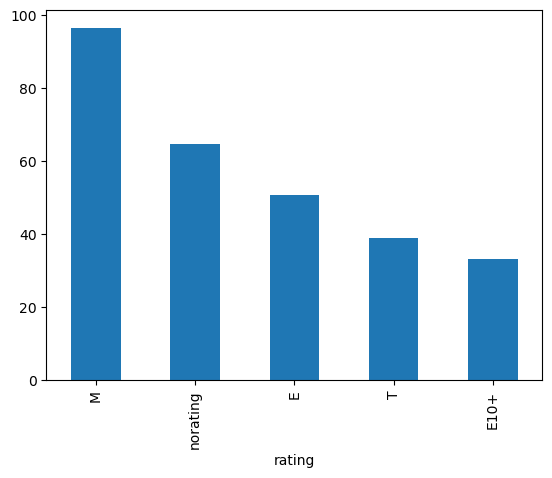

In [45]:
na_rating.plot(kind='bar')

<AxesSubplot:xlabel='rating'>

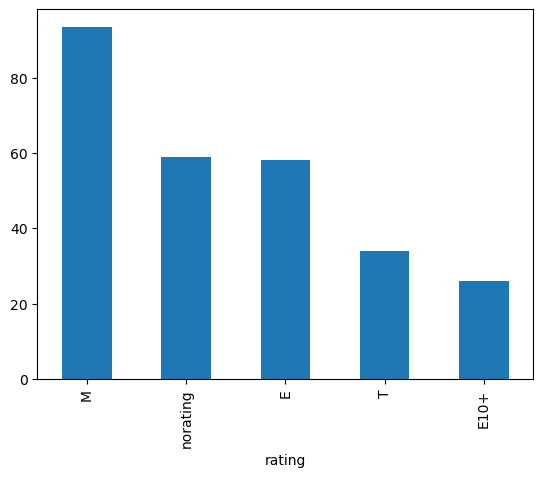

In [46]:
eu_rating.plot(kind='bar')

<AxesSubplot:xlabel='rating'>

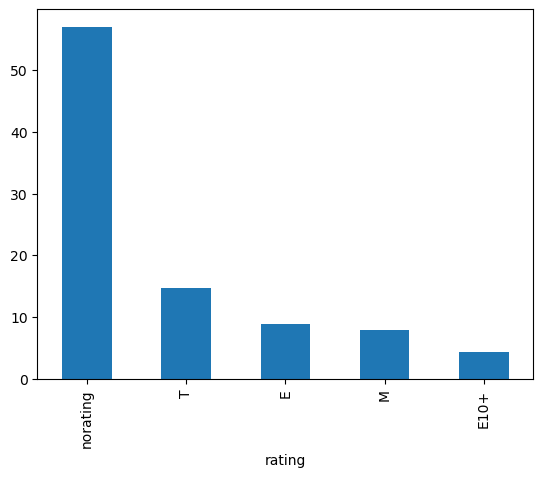

In [47]:
jp_rating.plot(kind='bar')

Во всех трех регионах большая доля игр приходится на игры с рейтингом E (для всех). На втором месте в Европе и Америке находятся игры для взрослых, в то время как в Японии это игры для тинейджеров.   

## Проверка гипотез

*5.1 Средние пользовательские рейтинги платформ XBox One и PC одинаковые*

Нулевая гипотеза: средние пользовательские рейтинги платформ XBox One и PC  **равны**.

Альтернативная гипотеза: средние пользовательские рейтинги платформ XBox One и PC **не равны**.

In [48]:
xone = games_actual_period[games_actual_period['platform']=='XOne']['user_score'].dropna()
pc = games_actual_period[games_actual_period['platform']=='PC']['user_score'].dropna()
alpha = 0.05
results =  st.ttest_ind(
    xone, 
    pc)
print('p-значение:',results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Выше мы сравнили среднее двух генеральных совокупностей с помощью t-теста.

Критический уровень статистической значимости: 5%.

P-value оказался 5.6% (что значит, что вероятность получить такое или большее различие случайно 5.6%). P-value больше, чем заданный нами уровень статистической значимости, поэтому мы не можем отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ XBox One и PC равны. 

*5.2 Средние пользовательские рейтинги жанров Action (англ. "действие", экшен-игры) и Sports (англ. "спортивные соревнования") разные*

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports **равны**.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports **не равны**.

In [49]:
action = games_actual_period[games_actual_period['genre']=='Action']['user_score'].dropna()
sport = games_actual_period[games_actual_period['genre']=='Sports']['user_score'].dropna()
alpha = 0.05
results =  st.ttest_ind(
    action, 
    sport)
print('p-значение:',results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Выше мы сравнили среднее двух генеральных совокупностей с помощью t-теста.

Критический уровень статистической значимости: 5%.

P-value оказался намного меньше 5% (что значит, что вероятность получить такое или большее различие случайно практически равно нулю), поэтому мы отвергаем нулевую гипотезу в пользу альтернативной гипотезы (средние пользовательские рейтинги жанров Action и Sports не равны).

## Общий вывод

В процессе работы были проанализированы данные о компьютерных играх: проведена предобработка и исследовательский анализ данных, составлен портрет пользователей трех регионов (Северная Америка, Европа и Япония) и проверены две гипотезы.

В ходе предобработки были обнаружены значения, которые необходимо было перевести в правильный тип, преобразованы  названия столбцов, были проверены и обработаны пропущенные значения, добавлен необходимый столбец для дальнейшего анализа.

Основные выводы:

* Эра индустрии компьютерных игр начинается с 1994 года и этот подъем продолжается до 2008 года. С 2008 года начинается спад интереса к компьютерным играм.

* Топ платформ с наибольшими суммарными продажами - это PS2, X360, PS3. 

* ”Срок жизни" платформ составляет около 10 лет, пик интереса наступает через 5 лет.

* Всем известные популярные платформы, такие как PS2, X360, PS3, Wii, DS уже прошли свой “цикл жизни” и их развитие практически закончилось. 

* PS4 и XOne являются на данный момент самыми перспективными.

* Между продажами компьютерных игр и отзывами критиков есть умеренная корреляция,  т.е. чем выше оценка, тем больше продаж. Эта тенденция характерна для всех платформ, за исключением Wii, где пользователи меньше прислушиваются к мнению критиков. 
 
* Оценкам других пользователей не оказывают влияние на продажи.

* Самыми прибыльными жанрами можно считать Action, Shooter и Sports. Наименее прибыльные жанры - это Puzzle и Strategy.

* Топ-5 рейтинг платформ за последние 10 лет:
    * Северная Америка: X360, Wii, PS3, DS, PS4
    * Европа: PS3, X360, Wii, PS4, DS
    * Япония: DS, 3DS, PS3, PSP, Wii

* В Америке и в Европе топ популярных жанров: Action, Shooter, Sports. В Японии лидер - ролевые игры, лишь затем Action, Misc, Sports.

* Во всех трех регионах большая доля игр приходится на игры с рейтингом E (для всех). На втором месте в Европе и Америке находятся игры для взрослых, в то время как в Японии это игры для тинейджеров.


